<h1 align="center">evaluation set-up</h1>

In [1]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\felix\\OneDrive - University of Bristol\\Year 4\\1. Design Project 4\\Project\\weld-spot-prediction\\evaluation'

In [3]:
# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):
 
    # checking for left mouse clicks
    if event == cv.EVENT_LBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
#         print(x, ' ', y)
        xs.append(x)
        ys.append(y)
 
        # displaying the coordinates
        # on the image window
        font = cv.FONT_HERSHEY_SIMPLEX
        cv.putText(imgS, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv.imshow('image', imgS)

In [12]:
# original image spot evaluation path 
og_spot_ev_path = r"C:\Users\felix\OneDrive - University of Bristol\Year 4\1. Design Project 4\Project\weld-spot-prediction\evaluation\module_3\\"
test_img = 'test_image'

# random image path
# og_spot_ev_path = r"C:\Users\felix\OneDrive - University of Bristol\Year 4\1. Design Project 4\Project\weld-spot-prediction\evaluation\tests\\"
# test_img = 'test7'

# reading the image
img = cv.imread(og_spot_ev_path + test_img + '.jpg', 1)
y_dim = img.shape[0]
x_dim = img.shape[1]

# resize to fit window (todo - autofit rather than apply rough scale factor of 0.3)
y_sf = 0.3
x_sf = 0.3
y_dim_rs = int(y_dim*y_sf)
x_dim_rs = int(x_dim*x_sf)

imgS = cv.resize(img, (x_dim_rs, y_dim_rs))  

# displaying the image
cv.imshow('image', imgS)

xs = []
ys = []

# setting mouse handler for the image
# and calling the click_event() function
cv.setMouseCallback('image', click_event)

# wait for a key to be pressed to exit
cv.waitKey(0)

# close the window
cv.destroyAllWindows()

print('xs =', xs)
print('ys =', ys)

xs = [1037, 972, 905, 836, 764, 695, 635, 564, 495, 425, 350, 285, 213, 144, 1074, 1008, 942, 871, 802, 733, 662, 600, 528, 464, 392, 318, 248, 178, 101, 1107, 1039, 971, 903, 837, 764, 698, 629, 560, 491, 424, 352, 282, 216, 138, 1076, 1007, 940, 873, 802, 729]
ys = [432, 428, 428, 425, 424, 421, 418, 423, 418, 419, 416, 415, 412, 417, 487, 486, 486, 487, 484, 479, 479, 483, 480, 477, 477, 475, 474, 478, 478, 552, 548, 547, 547, 546, 545, 545, 541, 542, 541, 535, 539, 537, 537, 538, 608, 606, 609, 604, 606, 603]


In [13]:
len(xs)

50

In [14]:
# if there are duplicate entries, there will be > 80 entries in these lists (assuming that there are 80 spot welds)
# in the image which should be the case for the bosch module

# to get rid of the duplicate, check the difference between 
if len(xs) > 90:
    
    for i in range(len(xs)):

        for j in range(len(xs)):
            x_delta = abs(xs[i] - xs[j])
            y_delta = abs(ys[i] - ys[j])
            
            if x_delta + y_delta < 5 and abs(i-j)>2:
                print(i, j)
                
else:
    print('No duplicate entries')

No duplicate entries


In [15]:
# del xs[37]
# del ys[37]

# len(xs)

In [16]:
xs = [int(x/x_sf) for x in xs]
ys = [int(y/y_sf) for y in ys]

In [17]:
xs[0:5]

[3456, 3240, 3016, 2786, 2546]

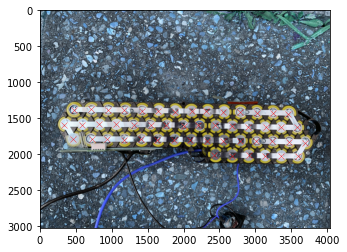

In [18]:
output_path = r"C:\Users\felix\OneDrive - University of Bristol\Year 4\1. Design Project 4\Project\weld-spot-prediction\evaluation\human_trials\\"
fig = plt.imshow(img)
plt.scatter(xs,ys, c='r', marker="x", alpha=0.7, linewidth=0.5)
plt.show
plt.savefig(output_path + test_img + '.png', dpi=500)

with open(output_path + test_img + '-x.json', "w") as fp:
    json.dump(xs, fp)
    
with open(output_path + test_img + '-y.json', "w") as fp:
    json.dump(ys, fp)

In [ ]:
with open(output_path + test_img + '-x.json', "r") as fp:
    test_x = json.load(fp)
    
with open(output_path + test_img + '-y.json', "r") as fp:
    test_y = json.load(fp)
    
print(xs == test_x)
print(ys == test_y)